In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define kernels
kernels = {
    "Blur": np.ones((5, 5), np.float32) / 25,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Horizontal Derivative (Sobel X)": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Vertical Derivative (Sobel Y)": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Gaussian Blur": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16,
    "Laplacian Edge Detection": np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
}

# Define utility functions
def load_image(filepath):
    image = cv2.imread(filepath)
    if image is None:
        print("Error: Image not found.")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    resized = cv2.resize(image, (width, height))
    return resized

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def apply_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


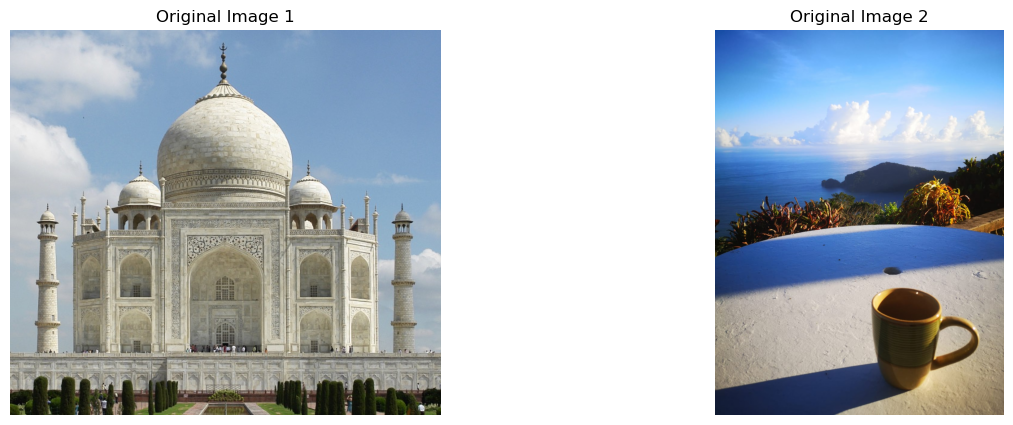

In [17]:
# Load and display multiple images
image_paths = [".././images/Taj_Mahal.jpg", ".././images/coffee_view.jpeg"]
original_images = [load_image(path) for path in image_paths]

# Display the images with individual titles
display_images(original_images, ["Original Image 1", "Original Image 2"], cmap=None)


ส่วนที่ 1: เปรียบเทียบการ Resizing ที่มีผลต่อการ Convolution

- ให้นักศึกษาโหลดภาพที่กำหนดมาให้และปรับขนาดภาพในหลายขนาด เช่น 25%, 50%, และ 75% แล้วแปลงภาพเหล่านั้นเป็นภาพ Grayscale
- ให้นักศึกษานำ Kernel "Edge Detection" มาใช้กับแต่ละขนาดภาพ แล้วสังเกตความแตกต่างที่เกิดขึ้น

ส่วนที่ 2: สร้างการเปรียบเทียบของ Kernels ที่หลากหลาย

- ให้นักศึกษาเลือก Kernel ที่สนใจ 3 ชนิด แล้วนำไปใช้กับภาพ Grayscale ขนาดต่างๆ และเปรียบเทียบผลลัพธ์ เช่นเปรียบเทียบ "Emboss" กับ "Gaussian Blur" กับ "Sharpen" และอธิบายความแตกต่างในรูปภาพที่ได้ในแต่ละกรณี

ส่วนที่ 3: สร้างและทดลอง Kernel แบบ Custom

- ให้นักศึกษาออกแบบ Kernel ของตนเอง (เช่น อาจมีขนาด 3x3 หรือ 5x5) อาจจะใช้ chatgpt สร้าง kernel ชนิดใหม่ขึ้นมา และทดลองใช้งาน Kernel นี้กับภาพเดิม โดยอธิบายผลที่ได้ว่าทำให้เกิดการเปลี่ยนแปลงแบบใด

ส่วนที่ 4: ทดลองทำ Image Blending หลังใช้ Convolution

- ให้นักศึกษานำภาพที่ได้จาก Convolution หลายภาพมา Blend หรือรวมกัน (เช่น นำภาพจาก Edge Detection กับ Gaussian Blur มารวมกัน) โดยการนำภาพมาบวกหรือลบกัน และเปรียบเทียบผลที่ได้